<a href="https://colab.research.google.com/github/mohammad0alfares/Credit-Card-Fraud-Detection/blob/master/backup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Information about data set

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. **Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.**

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. 

# Import Data from Drive [OK]

Please download the data from https://www.kaggle.com/mlg-ulb/creditcardfraud

Info about data: it is a CSV file, contains 31 features, the last feature is used to classify the transaction whether it is a fraud or not



In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os 


In [4]:
cwd = os.getcwd()
print (cwd)
!ls -lah

/content
total 20K
drwxr-xr-x 1 root root 4.0K Jun 18 09:20 .
drwxr-xr-x 1 root root 4.0K Jun 18 09:16 ..
drwxr-xr-x 1 root root 4.0K Jun 16 16:13 .config
drwx------ 4 root root 4.0K Jun 18 09:20 drive
drwxr-xr-x 1 root root 4.0K Jun 10 16:28 sample_data


In [6]:
os.chdir("/content/drive/My Drive/CreditCard")

In [7]:
!wc -l creditcard.csv


284808 creditcard.csv


In [8]:
cwd = os.getcwd()
print (cwd)
!ls -lah

/content/drive/My Drive/CreditCard
total 144M
-rw------- 1 root root 144M Feb 29 08:20 creditcard.csv


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = "/content/drive/My Drive/creditcard.csv"

creditcard = pd.read_csv(url)

creditcard.head()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# How to Deal with Imbalanced Dataset [OK]

In [10]:
print(creditcard.shape)

(284807, 31)


In [11]:
print(creditcard.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [12]:
## check null values 
print (f'Number if the records = {creditcard.shape[0]}')
pd.isnull(creditcard).sum()

Number if the records = 284807


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
creditcard["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [14]:
## the data is highly unbalanced
positive =  creditcard[creditcard.Class == 1]
positive_cnt = positive.shape[0]

negative =  creditcard[creditcard.Class == 0]
negative_cnt = negative.shape[0]

fruad_pct= positive_cnt / (positive_cnt  + negative_cnt )
print(f'records count = {creditcard.shape[0]} , fruad records = {positive_cnt} ,  the positive class (frauds) {round(fruad_pct*100,3)}%')


records count = 284807 , fruad records = 492 ,  the positive class (frauds) 0.173%


Observations:

We will use the Credit Card Fraud Detection Dataset available on Kaggle. The dataset is high imbalanced, with only 0.17% of transactions being classified as fraudulent.

**Imbalanced Classes**

Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce error.


https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18


We explored 5 different methods for dealing with imbalanced datasets:
Change the performance metric


1.   Change the performance metric
2.   Change the algorithm
3.   Oversample minority class
4.   Undersample majority class
5.   Generate synthetic samples




In [28]:
from sklearn.model_selection import train_test_split
x = creditcard.drop('Class',axis=1)
y = creditcard.Class
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print('size of test dataset = {}, size of traing data = {}, percentage = {}%'.format(len(x_test),len(x_train),len(x_test)*100/(len(x_test) + len(x_train))))

size of test dataset = 56962, size of traing data = 227845, percentage = 20.000210668979342%


In [ ]:
# Modeling the data as is
# Train model
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(solver='liblinear').fit(x_train, y_train)
 
# Checking accuracy
ACC_train_lr = model_lr.score(x_train, y_train)
ACC_test_lr = model_lr.score(x_test, y_test)
print(ACC_train_lr*100)
print(ACC_test_lr*100)

# Predict on training set
lr_pred = model_lr.predict(x_test)


99.90037086615902
99.89466661985183


high score !
but Let’s see what happens when we apply these F1 and recall scores to our logistic regression from above.

**1-Change the performance metric**

In [ ]:
# 1-Change the performance metric

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

print('accuracy_score= ', accuracy_score(y_test, lr_pred))
print('f1_score= ', f1_score(y_test, lr_pred))
print('recall_score= ', recall_score(y_test, lr_pred))


accuracy_score=  0.9989466661985184
f1_score=  0.6428571428571429
recall_score=  0.5192307692307693


These scores don’t look quite so impressive

**2. Change the algorithm**

Decision trees frequently perform well on imbalanced data. They work by learning a hierarchy of if/else questions and this can force both classes to be addressed

In [ ]:
# 2. Change the algorithm
from sklearn.ensemble import RandomForestClassifier

# train model
model_rfc = RandomForestClassifier(n_estimators=10).fit(x_train, y_train)

# predict on test set
rfc_pred = model_rfc.predict(x_test)


In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy_score= ', accuracy_score(y_test, rfc_pred))

from sklearn.metrics import f1_score
# f1 score
print('f1_score= ', f1_score(y_test, rfc_pred))

from sklearn.metrics import recall_score
# recall score
print('recall_score= ', recall_score(y_test, rfc_pred))

accuracy_score=  0.9994733330992591
f1_score=  0.8314606741573033
recall_score=  0.74


While our accuracy score is slightly lower, both F1 and recall have increased as compared to logistic regression! It appears that for this specific problem, random forest may be a better choice of model.

**3. Resampling Techniques — Oversample minority class**

we would split into test and train sets BEFORE trying oversampling techniques.

In [27]:
from sklearn.utils import resample

# Separate input features and target
y = creditcard.Class
X = creditcard.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Class.value_counts()


NameError: ignored

In [ ]:
# trying logistic regression again with the balanced dataset
y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)
upsampled_pred = upsampled.predict(X_test)
   

In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy_score= ', accuracy_score(y_test, upsampled_pred))

from sklearn.metrics import f1_score
# f1 score
print('f1_score= ', f1_score(y_test, upsampled_pred))

from sklearn.metrics import recall_score
# recall score
print('recall_score= ', recall_score(y_test, upsampled_pred))

accuracy_score=  0.9807589674447347
f1_score=  0.14375000000000002
recall_score=  0.8712121212121212


Our recall score increased, but F1 is much lower than with either our baseline logistic regression or random forest from above. Let’s see if undersampling might perform better here.

**4. Resampling techniques — Undersample majority class**

Again, we would split into test and train sets BEFORE trying Undersample techniques.

In [ ]:
# still using our separated classes fraud and not_fraud from above

# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.Class.value_counts()


1    360
0    360
Name: Class, dtype: int64

In [ ]:
# trying logistic regression again with the undersampled dataset

y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy_score= ', accuracy_score(y_test, undersampled_pred))

from sklearn.metrics import f1_score
# f1 score
print('f1_score= ', f1_score(y_test, undersampled_pred))

from sklearn.metrics import recall_score
# recall score
print('recall_score= ', recall_score(y_test, undersampled_pred))

accuracy_score=  0.9758574197354007
f1_score=  0.11710323574730355
recall_score=  0.8636363636363636


Undersampling underperformed oversampling in this case. Let’s try one more method for handling imbalanced data.

**5. Generate synthetic samples SMOTE**

Again, it’s important to generate the new samples only in the training set to ensure our model generalizes well to unseen data.

In [26]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
y = creditcard.Class
X = creditcard.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


NameError: ignored

In [ ]:
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy_score= ', accuracy_score(y_test, smote_pred))

from sklearn.metrics import f1_score
# f1 score
print('f1_score= ', f1_score(y_test, smote_pred))

from sklearn.metrics import recall_score
# recall score
print('recall_score= ', recall_score(y_test, smote_pred))

accuracy_score=  0.9858571388444145
f1_score=  0.18461538461538463
recall_score=  0.8636363636363636


It appears for this particular dataset random forest and SMOTE are the best of the options we tried here.

# EDA [OK]

In [ ]:
creditcard.shape

(284807, 31)

In [ ]:
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


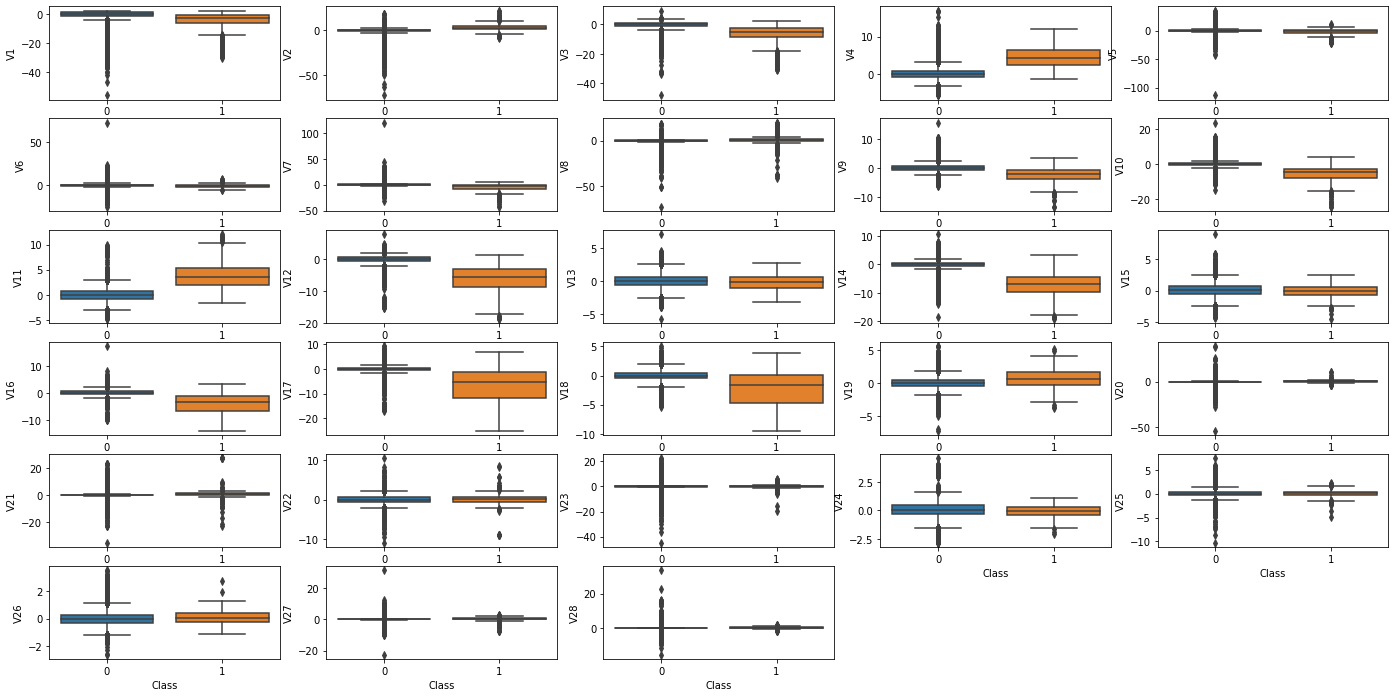

In [ ]:
def my_plot(plot_rows,plot_col,i,col):
    plt.subplot(plot_rows,plot_col,i)
    sns.boxplot(x='Class',y=col,data=creditcard)

plt.figure(figsize=(24,12))
axs = [ my_plot(6,5,i,'V'+str(i)) for i in range(1,29)]


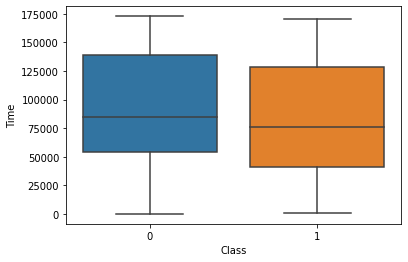

In [ ]:
sns.boxplot(x = "Class", y = "Time", data = creditcard)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


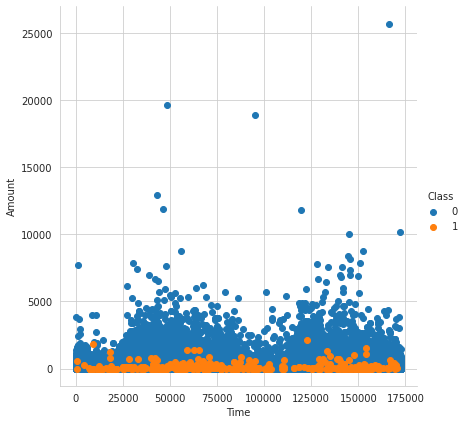

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(creditcard, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

Observations:

By looking at the above box plot we can say that both fraud & genuine transactions occur throughout time and there is no distinction between them.

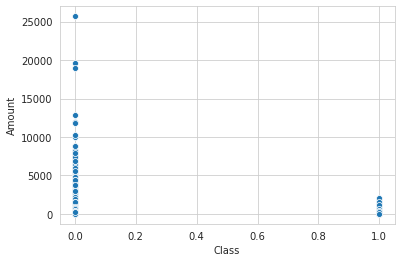

In [ ]:
sns.scatterplot(x = "Class", y = "Amount", data = creditcard)
plt.show()

Observations:

From above box plot we can easily infer that there are no fraud transactions occur above the transaction amount of 3000. All of the fraud transactions have transaction amount less than 3000. However, there are many transactions which have a transaction amount greater than 3000 and all of them are genuine.

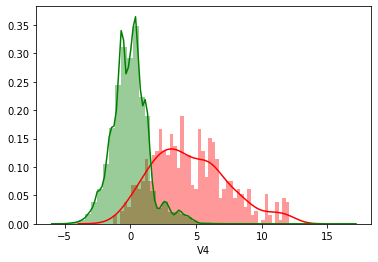

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
col='V4'

sns.distplot(creditcard[col][creditcard.Class == 1], bins=50, color='r')
sns.distplot(creditcard[col][creditcard.Class == 0], bins=50, color='g')
plt.show()

# ECDF [OK]

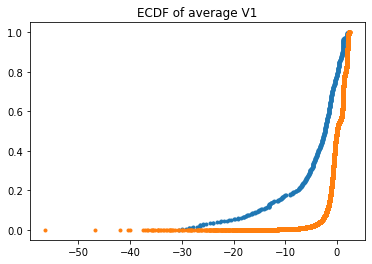

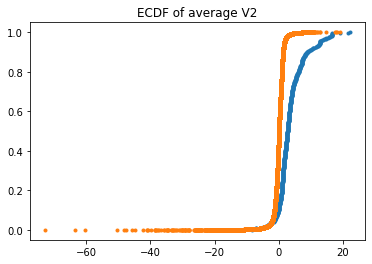

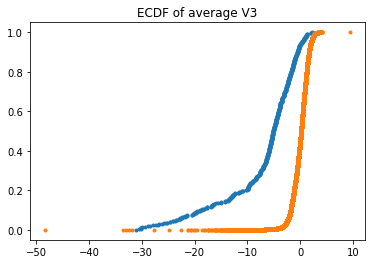

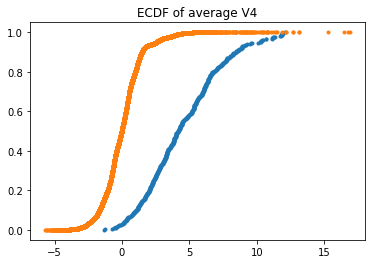

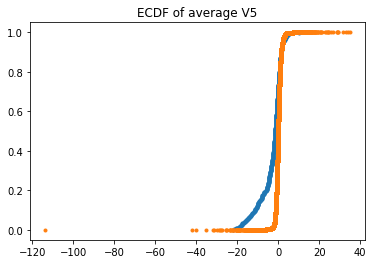

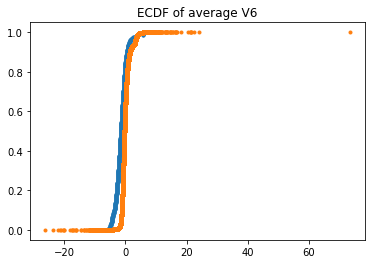

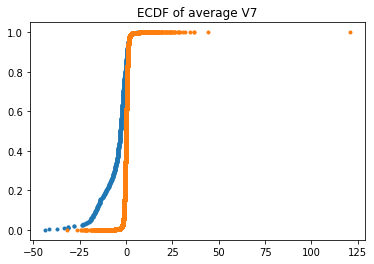

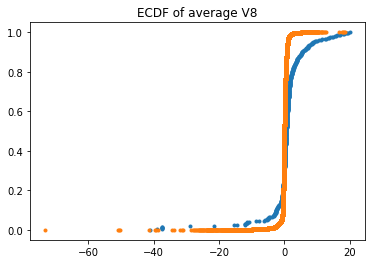

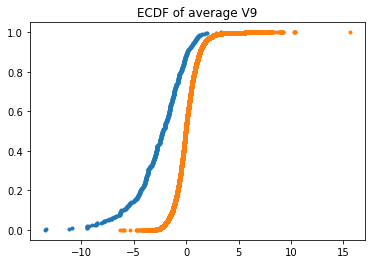

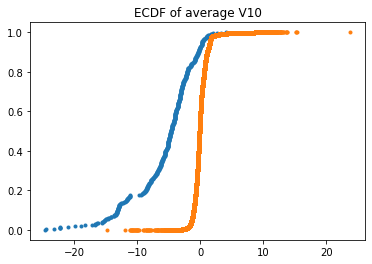

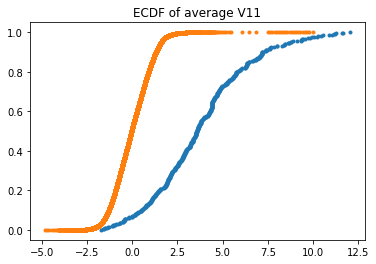

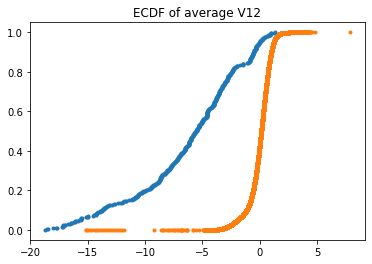

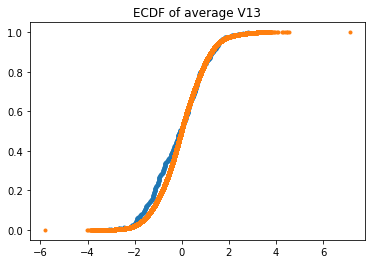

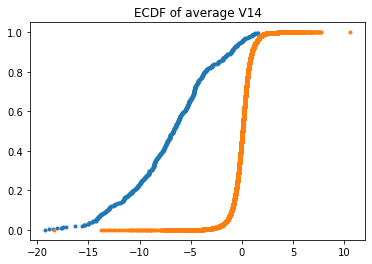

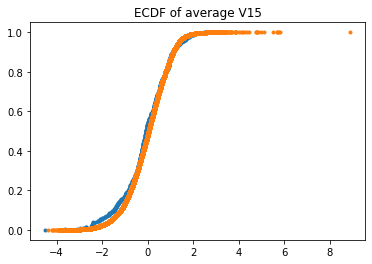

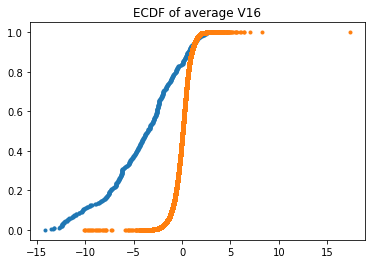

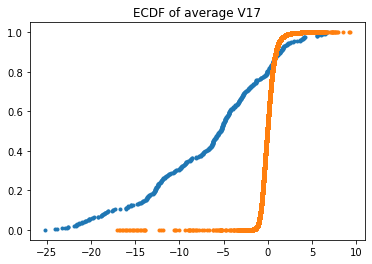

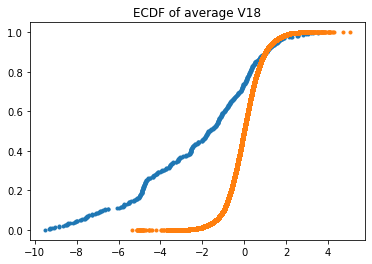

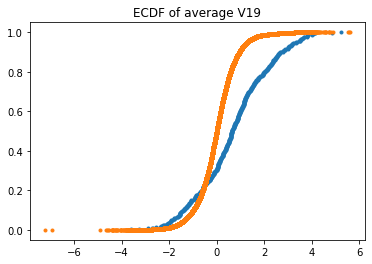

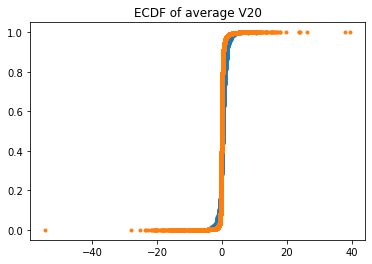

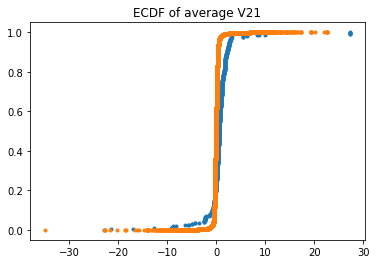

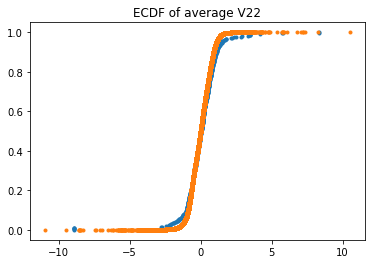

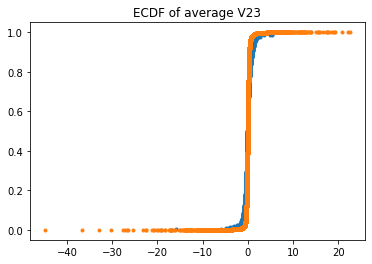

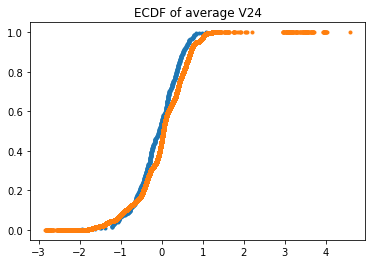

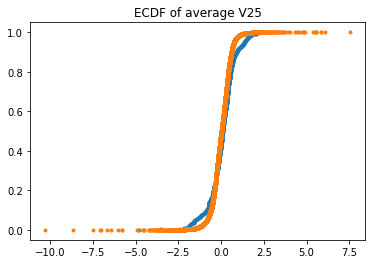

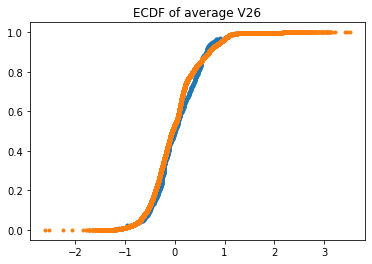

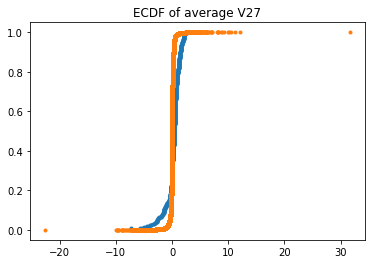

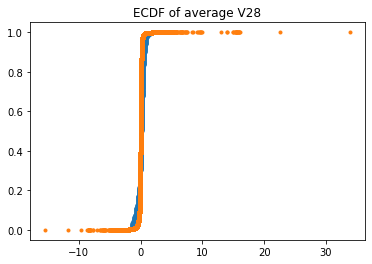

In [23]:
# Creating our ecdf function
def ecdf(data,i):
    xaxis = np.sort(data)
    yaxis = np.arange(1,len(data)+1)/len(data)
    plt.plot(xaxis,yaxis,linestyle='none',marker='.')
    plt.title('ECDF of average V'+str(i))

creditcardFraud=creditcard[creditcard['Class']==1]
creditcardNotFraud=creditcard[creditcard['Class']==0]

for i in range(1,29):
    ecdf(creditcardFraud['V'+str(i)],i)
    ecdf(creditcardNotFraud['V'+str(i)],i)
    plt.show()


# Try Differnat classifiers (unbalanced) [OK]

In [ ]:
from sklearn.model_selection import train_test_split
x = creditcard.drop('Class',axis=1)
y = creditcard.Class
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print('size of test dataset = {}, size of traing data = {}, percentage = {}%'.format(len(x_test),len(x_train),len(x_test)*100/(len(x_test) + len(x_train))))

size of test dataset = 56962, size of traing data = 227845, percentage = 20.000210668979342%


In [ ]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [ ]:
## logistic regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)
ACC_train_lr = model_lr.score(x_train, y_train)
ACC_test_lr = model_lr.score(x_test, y_test)
print(ACC_train_lr*100)
print(ACC_test_lr*100)

99.88720402027694
99.89993328885924


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
##  Decision tree
from sklearn import tree
model_dt = tree.DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
ACC_train_dt = model_dt.score(x_train,y_train)
ACC_test_dt = model_dt.score(x_test,y_test)
print(ACC_train_dt*100)
print(ACC_test_dt*100)

100.0
99.9438221972543


In [ ]:
## Support Vector Machine
from sklearn.svm import SVC 
model_svm = SVC()
model_svm.fit(x_train, y_train)
ACC_train_svm = model_svm.score(x_train, y_train)
ACC_test_svm = model_svm.score(x_test, y_test)
print(ACC_train_svm*100)
print(ACC_test_svm*100)


99.82488094976848
99.83673326077034


In [ ]:
## Random Forest 
from sklearn.ensemble import RandomForestClassifier 
model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)
ACC_train_rf = model_rf.score(x_train, y_train)
ACC_test_rf = model_rf.score(x_test, y_test)
print(ACC_train_rf*100)
print(ACC_test_rf*100)

100.0
99.96839998595554


In [ ]:
## Naive Bayse
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(x_train,y_train)
ACC_train_nb = model_nb.score(x_train,y_train)
ACC_test_nb = model_nb.score(x_test,y_test)
print(ACC_train_nb*100)
print(ACC_test_nb*100)

99.26485110491782
99.26968856430602


In [ ]:
from prettytable import PrettyTable
t = PrettyTable(['Accuracy', 'Logistic (%)' , 'DT (%)' , 'SVM (%)' , 'RF (%)' , 'NB (%)'])
t.add_row(['Training', ACC_train_lr*100, ACC_train_dt*100, ACC_train_svm*100, ACC_train_rf*100 , ACC_train_nb*100])
t.add_row(['Testing', ACC_test_lr*100, ACC_test_dt*100, ACC_test_svm*100, ACC_test_rf*100 , ACC_test_nb*100])
print(t)

+----------+-------------------+------------------+-------------------+-------------------+-------------------+
| Accuracy |    Logistic (%)   |      DT (%)      |      SVM (%)      |       RF (%)      |       NB (%)      |
+----------+-------------------+------------------+-------------------+-------------------+-------------------+
| Training | 99.88720402027694 |      100.0       | 99.82488094976848 |       100.0       | 99.26485110491782 |
| Testing  | 99.89993328885924 | 99.9438221972543 | 99.83673326077034 | 99.96839998595554 | 99.26968856430602 |
+----------+-------------------+------------------+-------------------+-------------------+-------------------+


In [ ]:
# use differant performance metric on DT
lr_pred = model_lr.predict(x_test)
dt_pred = model_dt.predict(x_test)
svm_pred = model_svm.predict(x_test)
rf_pred = model_rf.predict(x_test)
nb_pred = model_nb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
lr_accuracy_score=  accuracy_score(y_test, lr_pred)
dt_accuracy_score=  accuracy_score(y_test, dt_pred)
svm_accuracy_score=  accuracy_score(y_test, svm_pred)
rf_accuracy_score=  accuracy_score(y_test, rf_pred)
nb_accuracy_score=  accuracy_score(y_test, nb_pred)

from sklearn.metrics import f1_score
# f1 score : F1 score reaches its best value at 1 and worst score at 0
lr_f1_score= f1_score(y_test, lr_pred)
dt_f1_score= f1_score(y_test, dt_pred)
svm_f1_score= f1_score(y_test, svm_pred)
rf_f1_score= f1_score(y_test, rf_pred)
nb_f1_score= f1_score(y_test, nb_pred)

from sklearn.metrics import recall_score
# recall score : The best value is 1 and the worst value is 0
lr_recall_score= recall_score(y_test, lr_pred)
dt_recall_score= recall_score(y_test, dt_pred)
svm_recall_score= recall_score(y_test, svm_pred)
rf_recall_score= recall_score(y_test, rf_pred)
nb_recall_score= recall_score(y_test, nb_pred)

In [ ]:
from prettytable import PrettyTable
t2 = PrettyTable(['Accuracy', 'Logistic (%)' , 'DT (%)' , 'SVM (%)' , 'RF (%)' , 'NB (%)'])
t2.add_row(['accuracy_score', lr_accuracy_score*100, dt_accuracy_score*100, svm_accuracy_score*100, rf_accuracy_score*100 , nb_accuracy_score*100])
t2.add_row(['f1_score',       lr_f1_score*100      , dt_f1_score*100      , svm_f1_score*100       , rf_f1_score*100       , nb_f1_score*100]      )
t2.add_row(['recall_score',   lr_recall_score*100  , dt_recall_score*100  , svm_recall_score*100  , rf_recall_score*100   , nb_recall_score*100]  )
print(t2)

+----------------+-------------------+-------------------+-------------------+-------------------+-------------------+
|    Accuracy    |    Logistic (%)   |       DT (%)      |      SVM (%)      |       RF (%)      |       NB (%)      |
+----------------+-------------------+-------------------+-------------------+-------------------+-------------------+
| accuracy_score | 99.89993328885924 |  99.9438221972543 | 99.83673326077034 | 99.96839998595554 | 99.26968856430602 |
|    f1_score    | 70.76923076923077 | 82.22222222222221 |        0.0        | 89.53488372093022 | 23.80952380952381 |
|  recall_score  | 74.19354838709677 | 79.56989247311827 |        0.0        | 82.79569892473118 | 69.89247311827957 |
+----------------+-------------------+-------------------+-------------------+-------------------+-------------------+


# To Be

*   ECDF
*   K-FOLD
*   Data Hacke ( re-sampling) 









# Cross Validation KFOLD [OK]

In [ ]:
from sklearn.model_selection import cross_val_score

 

##LR

from sklearn.linear_model import LogisticRegression

ACC_test_lr = cross_val_score(LogisticRegression(),x,y)

 

##DT

from sklearn.tree import DecisionTreeClassifier

ACC_test_dt = cross_val_score(DecisionTreeClassifier(),x,y)

 

##SVM

from sklearn.svm import SVC

ACC_test_svm = cross_val_score(SVC(),x,y)

 

##RF

from sklearn.ensemble import RandomForestClassifier

ACC_test_rf = cross_val_score(RandomForestClassifier(),x,y)

 

##NB

from sklearn.naive_bayes import GaussianNB

ACC_test_nb = cross_val_score(GaussianNB(),x,y)

 

ACC_test_lr_mean = np.mean(ACC_test_lr);

ACC_test_dt_mean = np.mean(ACC_test_dt);

ACC_test_svm_mean = np.mean(ACC_test_svm);

ACC_test_rf_mean = np.mean(ACC_test_rf);

ACC_test_nb_mean = np.mean(ACC_test_nb);

 

from prettytable import PrettyTable

t = PrettyTable(['KVC Accuracy', 'Logistic (%)' , 'DT (%)' , 'SVM (%)' , 'RF (%)', 'NB (%)'])

t.add_row(['Testing', ACC_test_lr_mean*100, ACC_test_dt_mean*100, ACC_test_svm_mean*100, ACC_test_rf_mean*100, ACC_test_nb_mean*100])

print(t)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
